# Supervised Learning and Model Selection

We continue the discussion on supervised learning. This notebook will use the well-studied dataset on hand-written digits. The target is 10 discrete numbers from 0 to 9, therefore this is a classification problem. We will try several supervised learning algorithms including:


*   Logistic Regression
*   Decision Tree
*   Naive Bayesian 
*   Random Forest 
*   N-nearest Neighbors
*   Stochastic Gradient Descent
*   Support Vector Machine 

With standard API, scikit learn make the training a very easy task. 

Our focus will be on understand the prediction result and model selection. We will also study 

* Confusion Matrix for model evaluation 
* Dimension Reduction 



### 1. A Quick Solution Using SKlearn

In [0]:
# import numpy to create X and y arrays
import numpy as np

# use sklearn's embedded datasets
from sklearn import datasets

# pick a supervised learning algorithm
from sklearn import svm

# let's try the hand-written digits dataset first
digits = datasets.load_digits()

In [3]:
# explore the dataset 

print(digits.data.shape) #1797 samples of 8x8 images, 2D array
print(type(digits.data)) #imported dataset is stored as ndarray
print(digits.data.dtype) #all the data is in float64
print(np.amax(digits.data))  #values range from 0-16
print(digits.data) 


(1797, 64)
<class 'numpy.ndarray'>
float64
16.0
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
# observe y - target

print(digits.target)

[0 1 2 ... 8 9 8]


In [0]:
# define a learning model

clf = svm.SVC()

## Brief introduction to Support Vector Machine
https://en.wikipedia.org/wiki/Support-vector_machine

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png", width=300, height=300 )

In [0]:
# predefine paprameters, use tab key or shift+tab to see all options or visit the sklearn page 
clf = svm.SVC(gamma=0.001, C=100)

In [0]:
# define X, y
X,y = digits.data[:-10], digits.target[:-10]

In [8]:
# make sure dimensions match
print(X.shape)
print(y.shape)


(1787, 64)
(1787,)


In [9]:
# train the model using model.fit(X,y)
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
# test the result using model.predict 
# print(clf.predict(digits.data[-5]))
# Read the error message and explain why
print(clf.predict(digits.data[-5].reshape(1,-1)))

[9]


The Target is :  9


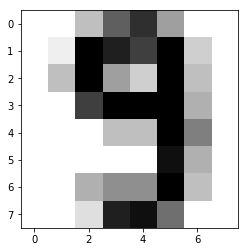

In [5]:
# let's see if the predicted digit is correct 
print("The Target is : ", digits.target[-5])

# show the actual image 
import matplotlib.pyplot as plt
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## 2. Understand Scikit-learn user manual and examples 
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

### Model Evaluation 

In [28]:
from IPython.display import IFrame
IFrame(src='https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/', width=600, height=400)

## 3. Let's try a larger dataset and other supervised learning algorithms

In [0]:
import tensorflow as tf

#mnist is embedded into keras
mnist = tf.keras.datasets.mnist


#the embedded mnist dataset has "load_data()" function
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#scale the values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
# observe the data
some_digit = x_train[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=plt.cm.gray_r,
           interpolation="nearest")
#plt.axis("off")

plt.show()
print(y_train[1]) # see the label

In [23]:
x_train.shape

(60000, 28, 28)

## How about we try Linear Regression model which we are already familiar with? 

In [7]:
from sklearn.linear_model import LinearRegression
import time
model_lm = LinearRegression()
t0 = time.time()
model_lm.fit(x_train.reshape(60000,784), y_train)
t1 = time.time()
print("Training Used %5.2f seconds!" % (t1-t0))

Training Used  6.81 seconds!


In [0]:
y_pred = model_lm.predict(x_test.reshape(10000,784))

#accuracy_score(y_test, y_pred)
#print(max(y_pred))

## OK, this is a classification program. Let's use logistic regression instead. ![alt text](https://i.stack.imgur.com/rhVmk.jpg)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/e376fe69caee24c914fab1360de36900b7bb9c24)

Logistic regression is to classify binary cases. However, we can implement a one-vs-all approach 

In [25]:
from sklearn.linear_model import LogisticRegression



model_lm = LogisticRegression(random_state=42)
t0 = time.time()
model_lm.fit(x_train.reshape(60000,784), y_train)
t1 = time.time()
print("Training Used %5.2f seconds!" % (t1-t0))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Used 127.62 seconds!


In [26]:
# predict using the trained the model

y_pred = model_lm.predict(x_test.reshape(10000,784))
from sklearn.metrics import accuracy_score


# use sklearn to evaluate the model
import sklearn as sk
print(accuracy_score(y_test, y_pred))
print()
print("Classification report for classifier %s:\n%s\n"
      % (model_lm, sk.metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % sk.metrics.confusion_matrix(y_test, y_pred))

0.9201

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.89      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.88      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                       

### Explore the sklearn library and try decision tree model? 
## [link text](https://scikit-learn.org/stable/modules/tree.html)


---


In [29]:
IFrame(src='https://medium.com/@rishabhjain_22692/decision-trees-it-begins-here-93ff54ef134', width=600, height=400)

In [0]:
##############################################################
##############################################################
##############   write your code here ########################



#############################################################
#############################################################


t0 = time.time()
model_tree.fit(x_train.reshape(60000,784), y_train)
t1 = time.time()
print("Used %5.2f seconds!" % (t1-t0))
y_pred = model_tree.predict(x_test.reshape(10000,784))

accuracy_score(y_test, y_pred)

In [0]:
#show the graphic tree
#not feasible on image dataset 
#see the example of Iris dataset
#https://scikit-learn.org/stable/modules/tree.html

import graphviz 
dot_data = tree.export_graphviz(model_tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Tree") 

'Tree.pdf'

### Try random forest first
![alt text](https://cdn-images-1.medium.com/max/1554/1*i0o8mjFfCn-uD79-F1Cqkw.png)

In [27]:
#n_estimator is the number of trees 
#n_estimator = 400 --> 221.16 seconds and 0.9712
#              100 -->54.81 seconds and 0.9704    default value in 0.22
#              10 --> 5.47 seconds and 0.9492   default value in 0.2

# train a rfc model

from sklearn.ensemble import RandomForestClassifier
import time


model_rfc = RandomForestClassifier(n_estimators=10
                                , random_state=42)
t0 = time.time()
model_rfc.fit(x_train.reshape(60000,784), y_train)
t1 = time.time()
print("Training Used %5.2f seconds!" % (t1-t0))

Training Used  5.53 seconds!


In [28]:
# predict using the train the model

y_pred = model_rfc.predict(x_test.reshape(10000,784))
from sklearn.metrics import accuracy_score


# use sklearn to evaluate the model
import sklearn as sk
print(accuracy_score(y_test, y_pred))
print()
#print("Classification report for classifier %s:\n%s\n"
#      % (model_rfc, sk.metrics.classification_report(y_test, y_pred)))
#print("Confusion matrix:\n%s" % sk.metrics.confusion_matrix(y_test, y_pred))

0.9492



### How about stochastic gradient descent? [Brief Intro](https://scikit-learn.org/stable/modules/sgd.html)

In [30]:
from sklearn.linear_model import SGDClassifier

model_sgd = SGDClassifier(random_state=42)
t0 = time.time()
model_sgd.fit(x_train.reshape(60000,784), y_train)
t1 = time.time()
print("Training Used %5.2f seconds!" % (t1-t0))

Training Used 25.03 seconds!


In [31]:
y_pred = model_sgd.predict(x_test.reshape(10000,784))

accuracy_score(y_test, y_pred)

0.9174

### Support vector machine is supposed to give us better result
[SVM/SVR](https://scikit-learn.org/stable/modules/svm.html)

In [0]:
# Don't try svm in class!!! It takes about 10 minutes to reach 97.92% accuracy 

from sklearn import svm
model_svm = svm.SVC(gamma='scale', random_state=42)
t0 = time.time()
model_svm.fit(x_train.reshape(60000,784), y_train)
t1 = time.time()
print("Used %5.2f seconds!" % (t1-t0))
y_pred = model_svm.predict(x_test.reshape(10000,784))
accuracy_score(y_test, y_pred)

In [0]:
# lots of parameters to tune. Kernel and other parameters affects training time
# need dimension reduction methods such as PCA to reduce the number of features
# https://scikit-learn.org/stable/modules/svm.html 

#first 20000 samples
#Used 132.22 seconds! 93.3 seconds with GPU
#0.9695

#all 60000 samples
#Used 702.90 seconds!  567 seconds with GPU
#0.9792


Used 540.07 seconds!


0.9792

### Now, we need to consider working on different parameters and really understanding the algorithms. Scikit-learn has modules to help search optimal parameters.  

## Dimension Reduction and Unsupervised Learning
* [PCA Scikit Learn Document](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)
* [PCA and LDA](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py/)
* [PCA and SVD](https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8)
*[Visual Demo](https://hackernoon.com/supervised-machine-learning-dimensional-reduction-and-principal-component-analysis-614dec1f6b4c)

![2D](https://cdn-images-1.medium.com/max/800/1*4g773zGtB6As7iId_Zu_7g.png)
![3D](https://cdn-images-1.medium.com/max/1600/1*Wcn_sTqL05a7vHpmxf24Dw.png)

In [0]:
#keep 30 components/features
#32.28 seconds  0.9756

# use principal component analysis or singular value decomposition
from sklearn.decomposition import PCA,TruncatedSVD
svd = TruncatedSVD(n_components = 30)
x_train_svd = svd.fit(x_train.reshape(60000,784)).transform(x_train.reshape(60000,784))
x_test_svd = svd.transform(x_test.reshape(10000,784))

In [0]:
from sklearn import svm
model_svm = svm.SVC(gamma='scale', random_state=42)
t0 = time.time()
model_svm.fit(x_train_svd, y_train)
t1 = time.time()
print("Used %5.2f seconds!" % (t1-t0))
y_pred = model_svm.predict(x_test_svd)
accuracy_score(y_test, y_pred)

## Variance Explained

In [0]:
svd = TruncatedSVD(n_components = 783)
x_train_svd = svd.fit(x_train.reshape(60000,784)).transform(x_train.reshape(60000,784))

import matplotlib.pyplot as plt
plt.title("Explained Variance vs. Number of Principle Components")
plt.xlabel("Number of Components")
plt.ylabel("Variance")
plt.scatter(range(1,svd.n_components+1), svd.explained_variance_)
plt.show()
# svd.explained_variance_



In [0]:
cumulative_explained_variance=[]
for n in range(28*28):
  cumulative_explained_variance.append(svd.explained_variance_ratio_[:n].sum())
  

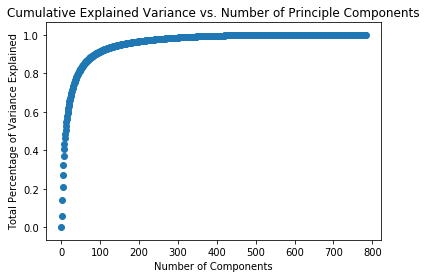

In [26]:
plt.title("Cumulative Explained Variance vs. Number of Principle Components")
plt.xlabel("Number of Components")
plt.ylabel("Total Percentage of Variance Explained")
plt.scatter(range(28*28),cumulative_explained_variance)
plt.show()

In [0]:
svd.explained_variance_ratio_[:30].sum()